In [34]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame with inconsistent column names, missing data, outliers, and duplicate rows
data = {
    'Customer_ID': [1, 2, 3, 4, 5],
    'Customer Name': ['John', 'Alice', 'Bob', 'Jane', 'Mary'],
    'Age': [25, 30, np.nan, 40, 50],
    'Income': [50000, 60000, 70000, 80000, 90000],
    'Product_Purchased': ['A', 'B', 'C', 'D', 'E']
}
df = pd.DataFrame(data)

# Print the original DataFrame
print("Original DataFrame:")
print(df)
print()

# Renaming inconsistent column names
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

# Dropping unnecessary column (Customer_ID)
df.drop(columns=['customer_id'], inplace=True)

# Filling missing data with mean
df['age'].fillna(df['age'].mean(), inplace=True)

# Dropping rows with missing data
df.dropna(inplace=True)

# Handling outliers (if any)
# we'll cap the age at 100
df['age'] = np.where(df['age'] > 100, 100, df['age'])

# Converting data types
df['age'] = df['age'].astype(int)

main = df

# Pattern matching in column values (if needed)
# For demonstration, let's filter rows where Customer Name starts with 'J'
df = df[df['customer_name'].str.startswith('J')]

# Concatenating DataFrames (with itself for demonstration)
df = pd.concat([df, df], ignore_index=True)

# Print the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df)


Original DataFrame:
   Customer_ID Customer Name   Age  Income Product_Purchased
0            1          John  25.0   50000                 A
1            2         Alice  30.0   60000                 B
2            3           Bob   NaN   70000                 C
3            4          Jane  40.0   80000                 D
4            5          Mary  50.0   90000                 E


Cleaned DataFrame:
  customer_name  age  income product_purchased
0          John   25   50000                 A
1          Jane   40   80000                 D
2          John   25   50000                 A
3          Jane   40   80000                 D


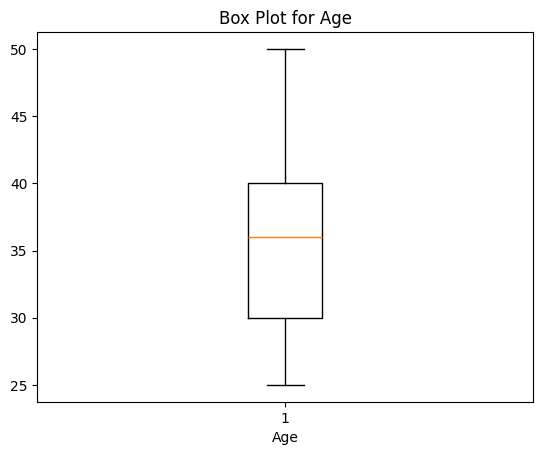

In [35]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a numeric column 'age'
plt.boxplot(main['age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()


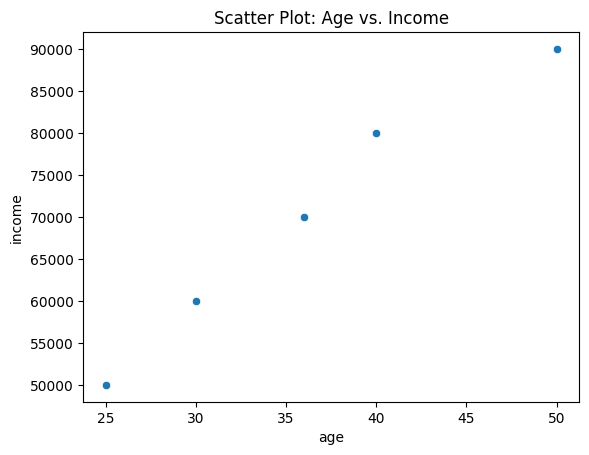

In [36]:
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'age' and 'income'
sns.scatterplot(x='age', y='income', data=main)
plt.title('Scatter Plot: Age vs. Income')
plt.show()


In [37]:
from scipy.stats import zscore

df = main
# Assuming you have a DataFrame 'df' with a numeric column 'age'
df['age_zscore'] = zscore(df['age'])
outliers = df[abs(df['age_zscore']) > 2]  # Adjust the threshold as needed
print("Potential outliers based on Z-score:")
print(outliers)


Potential outliers based on Z-score:
Empty DataFrame
Columns: [customer_name, age, income, product_purchased, age_zscore]
Index: []


In [38]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'name', 'treatment a', and 'treatment b'
melted_df = pd.melt(frame=df, id_vars='customer_name', value_vars=['income', 'age'])

# Print the melted DataFrame
print("Melted DataFrame:")
print(melted_df)


Melted DataFrame:
  customer_name variable  value
0          John   income  50000
1         Alice   income  60000
2           Bob   income  70000
3          Jane   income  80000
4          Mary   income  90000
5          John      age     25
6         Alice      age     30
7           Bob      age     36
8          Jane      age     40
9          Mary      age     50
